# Special Matrices and Matrix Operations
- Frobenius Norm
    - ```np.linalg.norm(matrix)```
    - ```torch.norm(matrix)```

In [1]:
import torch
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## 6.1 The Frobenius Norm
$||x||_F = \sqrt(\sum_{i},_{j}X^2_i,_j)$

<br />

For every single individual element in the matrix:
- square it,
- sum them,
- take the square root. 
    - Analogous to $L^2$ norm of vector
    - Measures the size of matrix in terms of Euclidean distance. 

### Manually

In [2]:
X = np.array([[1, 2], [3, 4]])
X

array([[1, 2],
       [3, 4]])

In [3]:
X_f = X.flatten()

Frob_norm = 0

for i in X_f:
    Frob_norm += i**2

Frob_norm = np.sqrt(Frob_norm)
Frob_norm

5.477225575051661

### NumPy

In [4]:
np.linalg.norm(X)

5.477225575051661

### PyTorch

In [5]:
X_pt = torch.tensor([[1, 2], [3, 4.]])
torch.norm(X_pt)

tensor(5.4772)

In [6]:
X_tf = tf.Variable([[1, 2], [3, 4.]])
tf.norm(X_tf)

<tf.Tensor: shape=(), dtype=float32, numpy=5.477226>

## 6.2 Matrix Inversion
- ```np.linalg.inv(matrix)```
- ```torch.inverse(matrix)```
- ```tf.linalg.inv(matrix)```

- Clever, convenient way to solve linear equations
- $Matrix inverse$ of $X$ is denoted as $X^-$$^1$
    - Satisfies: $X^-$$^1$$X = I_n$  
$1 0 0 0$  
$0 1 0 0$  
$0 0 1 0$  
$0 0 0 1$

### Matrix Multiplication in Regression 

- $y's$ are $n cases$ tall.  
$[y_1, y_2, y_3 ...$ $y_n]$  
<br />
- $x's$ are $n features$ wide.  
$[1, x_1,_1 + x_1,_2 + ... + mx_1,_m$ $]$  
$[1, x_2,_1 + x_2,_2 + ... + mx_2,_m$ $]$  
$[1, x_3,_1 + x_3,_2 + ... + mx_3,_m$ $]$  
...  
$[1, x_n,_1 + x_n,_2 + ... + mx_n,_m$ $]$  $multiplied$ $by$ $[a, b, c ... m$ $]$  

<br />

The regression formula can be represented as:   
$y = Xw$   
($w$ is the vector of weights $a$ through $m$)

<br />

In the equation $y = Xw$:  
- We konw the outcomes $y$ (house prices)
- We know the features $x$ (predictors like bedroom count)
- Vector $w$ contains the unknowns, which are $the$ $model's$ $learnable$ $parameters$.

<br />

Assuming $X^-$$^1$ exists, matrix inversion can solve for $w$:  
1) $Xw = y$   
2) $X^-$$^1Xw = X^-$$^1y$  
3) $I_nw = X^-$$^1y$  
4) $w$ $= X^-$$^1y$  

<br />

1) Let's isolate $w$.   
2) Multiply by the inverse of $X$.  
    - matrix times its inverse results in identity matrix.  
3) Identity matrix times a vector results in the vector itself.

### NumPy inversion

In [7]:
X = np.array([[4, 2], [-5, -3]])

In [8]:
Xinv = np.linalg.inv(X)
Xinv

array([[ 1.5,  1. ],
       [-2.5, -2. ]])

In [9]:
y = np.array([4, -7])
y

array([ 4, -7])

In [10]:
w = np.dot(Xinv, y)
w

array([-1.,  4.])

#### Verification

1) $Xw = y$   
2) $X^-$$^1Xw = X^-$$^1y$  
3) $I_nw = X^-$$^1y$  
4) $w$ $= X^-$$^1y$ &emsp; using 1) and 4)

In [11]:
np.dot(X,w)

array([ 4., -7.])

### PyTorch

In [12]:
torch.inverse(torch.tensor([[4, 2], [-5, -3.]]))    # float type

tensor([[ 1.5000,  1.0000],
        [-2.5000, -2.0000]])

### Tensorflow

In [13]:
tf.linalg.inv(tf.Variable([[4, 2], [-5, -3.]]))    # also float

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 1.4999999 ,  0.99999994],
       [-2.4999998 , -1.9999999 ]], dtype=float32)>

### Restrictions of inversion - i. singularity

Nifty trick, but can only be calculated if: 
- Matrix isn't 'singular'
- Meaning all columns of matrix **must be** $linearly$ $independent$. 

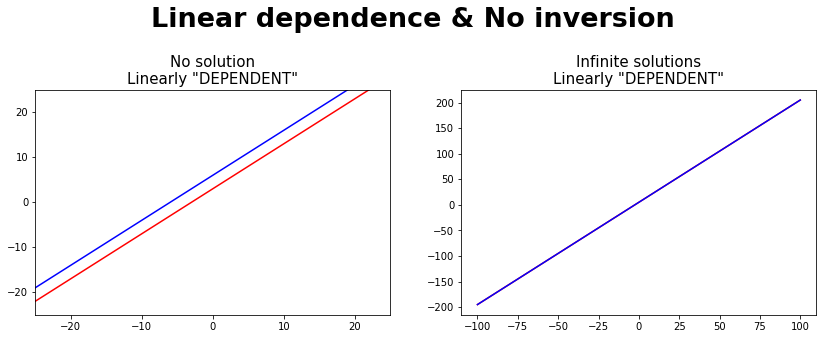

In [21]:
x = np.linspace(-100, 100, 10000)
y1 = x + 3
y2 = x + 6

y3 = 2 * x + 5
y4 = 4/2 * x + 10/2

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

fig.suptitle("Linear dependence & No inversion", fontsize=27, fontweight='bold')

ax[0].set_title('No solution\nLinearly "DEPENDENT"', fontsize=15)
ax[0].set_xlim([-25, 25])
ax[0].set_ylim([-25, 25])
ax[0].plot(x, y1, c='r')
ax[0].plot(x, y2, c='b')

ax[1].set_title('Infinite solutions\nLinearly "DEPENDENT"', fontsize=15)
ax[1].plot(x, y3, c='r')
ax[1].plot(x, y4, c='b')
plt.subplots_adjust(top=0.75)
plt.show()

### Restrictions of inversion - ii. square

Can also only be calculated if: 
- Matrix is square: $n_r$$_o$$_w$$= n_c$$_o$$_l$  
- (i.e. "vector span" = "matrix range")
    - Avoids **overdetermination**:   
$n_r$$_o$$_w$$ > n_c$$_o$$_l$  
i.e: &emsp; $n_e$$_q$$_u$$_a$$_t$$_i$$_o$$_n$$_s$$ > n_d$$_i$$_m$$_e$$_n$$_s$$_i$$_o$$_n$$_s$  

<br />

For instance, we have 3 rows and 2 columns.  
- = there are 3 equations with 2 variables (features)

<br />
  
- Avoids **underdetermination**:   
$n_r$$_o$$_w$$ < n_c$$_o$$_l$  
i.e: &emsp; $n_e$$_q$$_u$$_a$$_t$$_i$$_o$$_n$$_s$$ < n_d$$_i$$_m$$_e$$_n$$_s$$_i$$_o$$_n$$_s$

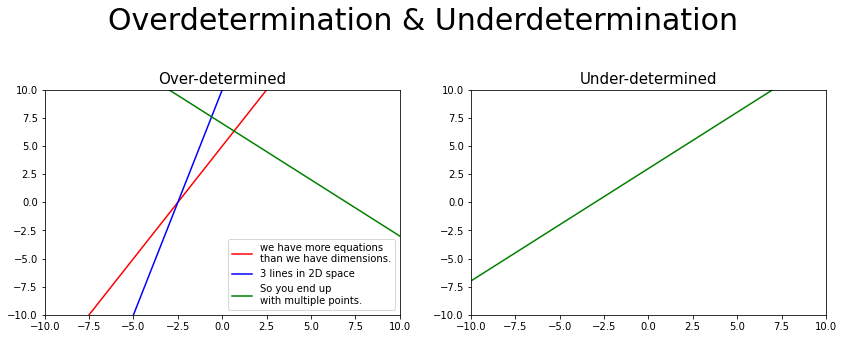

In [15]:
# multiple points overlapping.

x = np.linspace(-100, 100, 10000)
y1 = 2 * x + 5
y2 = 4 * x + 10
y3 = -x + 7

y4 = x + 3

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

fig.suptitle("Overdetermination & Underdetermination", fontsize=30)

ax[0].set_title('Over-determined', fontsize=15)
ax[0].set_xlim([-10, 10])
ax[0].set_ylim([-10, 10])
ax[0].plot(x, y1, c='r', label='we have more equations \nthan we have dimensions.')
ax[0].plot(x, y2, c='b', label='3 lines in 2D space')
ax[0].plot(x, y3, c='g', label='So you end up \nwith multiple points.')
ax[0].legend()

ax[1].set_title('Under-determined', fontsize=15)
ax[1].set_xlim([-10, 10])
ax[1].set_ylim([-10, 10])
ax[1].plot(x, y4, c='g', label='')
plt.subplots_adjust(top=0.75)
plt.show()

# In this case (impossible to solve by inversion), 
# we might be able to solve the equations by other means such as approximation.

### Matrix Inversion where one row is a multiple of the other.

In [16]:
X = np.array([[-4, 1], [-8, 2]]) # columns are not independent. row 2 is a multiple of row 1. 
X

array([[-4,  1],
       [-8,  2]])

In [17]:
Xinv = np.linalg.inv(X)

LinAlgError: ignored

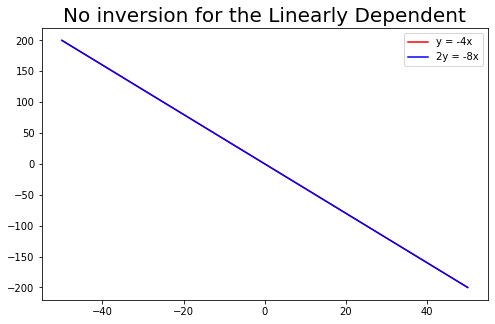

In [18]:
x = np.linspace(-50, 50, 1000)
y1 = -4 * x 
y2 = (-8 * x)/2

fig = plt.figure(figsize=(8, 5))

plt.title('No inversion for the Linearly Dependent', fontsize=20)
plt.plot(x, y1, c='r', label='y = -4x')
plt.plot(x, y2, c='b', label='2y = -8x')
plt.legend()
plt.show()

### Matrix Inversion where it's not square

In [19]:
X = np.array([[-4, 1, 3], [-8, 2, 4]])
X

array([[-4,  1,  3],
       [-8,  2,  4]])

In [20]:
Xinv = np.linalg.inv(X)

LinAlgError: ignored

## 6.3 Diagonal Matrices
- None zero elements along main diagonal; zeros everywhere else.
- Identity matrix is an example.
- $diag(x)$ &nbsp; where x is vector of main-diagonal elements.

$1 0 0 0$ &emsp; $2 0 0 0$ &emsp; $2 0 0 0$         
$0 1 0 0$ &emsp; $0 5 0 0$ &emsp; $0 5 0 0$       
$0 0 1 0$ &emsp; $0 0 7 0$ &emsp; $0 0 5 0$     
$0 0 0 1$ &emsp; $0 0 0 9$ &emsp; $0 0 0 5$     

<br />

Why is $diagonal$ $matrices$ important?
- Computationally efficient
    - Multiplication: &nbsp; $diag(x)y = x⊙y$ (dot product)
    - Inversion: $diag(x)^-$$^1 = diag[1/x_1, ..., 1/x_n]^T$
    - Inverse of all individual elements in vector $x$ transposed.
        - Can't divide by zero so $x$ can't include zero.
    - Can be non-square and computation is still efficient.
        - If &nbsp; $h > w$, &nbsp; simply add zeros to product.
        - If &nbsp; $w > h$, &nbsp; simply remove elements from product.

## 6.4 Orthogonal Matrices

- Orthogonal if they are **perpendicular** to each other (90 degree angle), (assuming non-zero norms)
- n-dimensional space has max n mutually-orthogonal vectors (assuming non-zero norms).
- **Basis vectors**: canonical example. 
- In orthogonal matrices, orthonormal vectors:
    - make up all rows
    - make up all columns.
- This means that: $A^TA = AA^T = I$ &emsp; (commutative)  
(A transpose A equals A A transpose)  
- Which also means: $A^T = A^1I = A^-$$^1$ &emsp;  
(A transpose equals A inverse times Identity which equals A inverse.)
- Calculating $A^T$ is computationally cheap operation, therefore so is calculating $A^-$$^1$

## 6.5 The Trace Operator
- np.trace(A)

- Denoted as $Tr(A)$.
- The sum of the diagonal elements of a matrix:  
$\sum_iA_i,_i$
- (Doesn't have to be a diagonal.)

In [22]:
A = np.array([[25, 2], [5, 4]])
A

array([[25,  2],
       [ 5,  4]])

In [23]:
np.trace(A)

29

### Useful properties
for re-arranging linear algebra equations.
- $Tr(A) = Tr(A^T)$  
(trace A equals trace A transpose)
- Assuming the matrix shapes line up: &nbsp; $Tr(ABC) = Tr(CAB) = Tr(BCA)$  
- In particular, the trace operator can provide a convenient way to calculate a matrix's Frobenius norm: &emsp;
$||A||_F = \sqrt{Tr(AA^T)}$  
(Frobenius norm of matrix A equals the square root of Trace of A by A transpose.)


### Exercise - 1. Trace
Using the matrix ```A_p```:  
    1. Identify the PyTorch trace method and the trace of the matrix. 

In [24]:
A_p = torch.tensor([[-1., 2], [3, -2], [5, 7]])
A_p

tensor([[-1.,  2.],
        [ 3., -2.],
        [ 5.,  7.]])

In [25]:
torch.trace(A_p)

tensor(-3.)

### Exercise - 2. Frobenius norm and transpose
2. Further, use the PyTorch Frobenius norm method (for the left-hand side of the equation) and the trace method(for the right-hand side of the equation) to demonstrate that:  
$||A||_F = \sqrt{Tr(AA^T)}$   

<br />

Recall that the trace function returns the sum of diagonal entries of a square matrix. and comes from the Frobenius inner product on the space of all matrices. The Frobenius norm is submultiplicative and is very useful for numerical linear algebra [(Wikipedia)](https://en.wikipedia.org/wiki/Matrix_norm).

In [26]:
torch.norm(A_p, p='fro')

tensor(9.5917)

In [27]:
A_t = A_p.T

np.sqrt(torch.trace(torch.matmul(A_p, A_t)))

tensor(9.5917)

# Error Notes
   
1) ```InvalidArgumentError ```  

        InvalidArgumentError: Value for attr 'T' of int32 is not in the list of allowed values: bfloat16, half, float, double, complex64, complex128
            ; NodeDef: {{node Sqrt}}; Op<name=Sqrt; signature=x:T -> y:T; attr=T:type,allowed=[DT_BFLOAT16, DT_HALF, DT_FLOAT, DT_DOUBLE, DT_COMPLEX64, DT_COMPLEX128]> [Op:Sqrt]

This occurs when the tensor values are all integer. ```int``` is not allowed for tensor creation in tensorflow. Make at least one of the elements float.

In [28]:
X_tf = tf.Variable(([[1, 2], [3, 4]]))
tf.norm(X_tf)

InvalidArgumentError: ignored